# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [749]:
import pandas as pd

In [750]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [752]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [753]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [754]:
Y = data['affair']

In [755]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [756]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [757]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [758]:
predictions = model.predict_proba(X_test)

In [759]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [760]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [761]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [762]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [763]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [764]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [765]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [766]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [767]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.04895298489027318)
(0.3074501573976915, 0.9982964224872232, 0.052098191068080245)
(0.30761154855643047, 0.9982964224872232, 0.052539545559255)
(0.3077731092436975, 0.9982964224872232, 0.05290951862937126)
(0.30793483972674723, 0.9982964224872232, 0.05372856464959367)
(0.30809674027339645, 0.9982964224872232, 0.05418294149815478)
(0.30825881115202525, 0.9982964224872232, 0.05456382058361409)
(0.30842105263157893, 0.9982964224872232, 0.054741310936288305)
(0.30858346498156924, 0.9982964224872232, 0.055453397823264576)
(0.3087460484720759, 0.9982964224872232, 0.057801337612338674)
(0.30890880337374804, 0.9982964224872232, 0.059328241773613795)
(0.3090717299578059, 0.9982964224872232, 0.05936553926787768)
(0.3092348284960422, 0.9982964224872232, 0.06182230445338815)
(0.3093980992608237, 0.9982964224872232, 0.06210531052131707)
(0.30956154252509244, 0.9982964224872232, 0.062440172645206536)
(0.3091966173361522, 0.9965928449744463, 0.06245992722965583)
(0.309360126

In [768]:
from sklearn.metrics import average_precision_score

In [769]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [770]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [1048]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [1068]:
for line in zip( fpr, tpr, thres ):
    print( line )
print(len(fpr))

(0.0, 0.0, 1.9445589136029695)
(0.0, 0.0017035775127768314, 0.9445589136029696)
(0.0, 0.017035775127768313, 0.8789939377792317)
(0.0007558578987150416, 0.017035775127768313, 0.8786478779112944)
(0.0007558578987150416, 0.028960817717206135, 0.8743556662464672)
(0.0022675736961451248, 0.028960817717206135, 0.8701673271799358)
(0.0022675736961451248, 0.034071550255536626, 0.866820140264318)
(0.003779289493575208, 0.034071550255536626, 0.8579621220526474)
(0.003779289493575208, 0.03577512776831346, 0.8557638745365836)
(0.0045351473922902496, 0.03577512776831346, 0.8523294480917275)
(0.0045351473922902496, 0.03747870528109029, 0.8505415403317492)
(0.006046863189720333, 0.03747870528109029, 0.8373703328383985)
(0.006046863189720333, 0.049403747870528106, 0.8283556865417957)
(0.006802721088435374, 0.049403747870528106, 0.8272570832978605)
(0.006802721088435374, 0.05281090289608177, 0.8244237816629214)
(0.007558578987150416, 0.05281090289608177, 0.8228902848542047)
(0.007558578987150416, 0.054

In [1050]:
import matplotlib.pyplot as plt

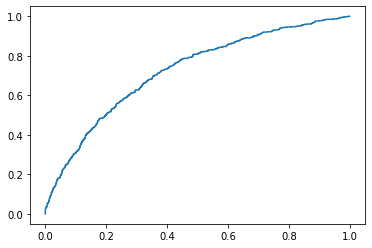

In [1051]:
plt.plot( fpr, tpr )

## ДЗ

In [1100]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

tp_new = tp
fp_new = fp
fn_new = fn
tn_new = tn

fpr_dz = []
tpr_dz = []
pres = []
porog = []

i = 0 
predictions = model.predict_proba( X_test )

for i, t in sorted(zip( predictions[:, 1], Y_test ), reverse=True):   

    
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ): 
        
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    if (tp != tp_new) & (fp != fp_new) &  (fn != fn_new) &  (tn != tn_new):
        tp_new = tp
        fp_new = fp
        fn_new = fn
        tn_new = tn
        fpr_dz.append(fp / (tn + fp)) 
        tpr_dz.append(tp / (fn + tp))
        pres.append(tp / (fp + tp))
        porog.append(i)

fpr_dz.append(fp / (fp + tn)) 
tpr_dz.append(tp / (tp + fn))
pres.append(tp / (fp + tp))
porog.append(i)  


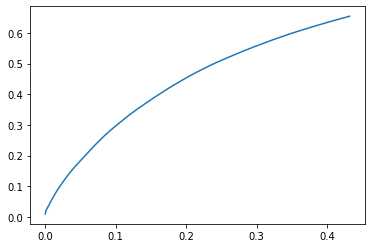

In [1101]:
plt.plot( fpr_dz, tpr_dz )

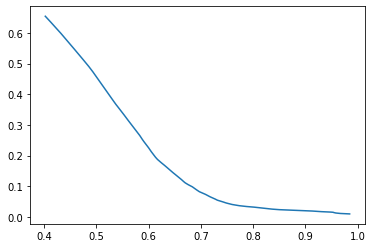

In [1090]:
plt.plot( pres, tpr_dz)

In [1095]:
for line in zip( fpr_dz, tpr_dz, porog):
    print( line )


(6.871435442864014e-05, 0.010066594393681277, 0.8786478779112944)
(0.00012597631645250694, 0.010789324247586598, 0.8778860800600263)
(0.00017442874585731728, 0.011531909317258551, 0.8772490766093666)
(0.00021595939963286903, 0.012290094913604284, 0.8766914098685719)
(0.0002519526329050139, 0.01306076093128904, 0.876397847451513)
(0.0002834467120181406, 0.013841567291311755, 0.8757535663601841)
(0.0003112356053532524, 0.01463072452149514, 0.8749223893660145)
(0.0003359368438733518, 0.01542684081014575, 0.8743556662464672)
(0.00039781994669212714, 0.01613915538420156, 0.8742309009028731)
(0.000491307634164777, 0.01678023850085179, 0.8701673271799358)
(0.0005758917323543174, 0.017441388821286607, 0.868554315043103)
(0.0006527863670720813, 0.018119869908626296, 0.8683698775816217)
(0.0007229945118143876, 0.01881342122805718, 0.866820140264318)
(0.000818846056941295, 0.01944917660420216, 0.8633794383544197)
(0.0009372637944066516, 0.020034071550255536, 0.8579621220526474)
(0.001046572475143

In [211]:
import numpy as np
import matplotlib.pyplot as plt


class FaceROCHelper:
    def __init__(self, idList, featureList, compareFunc=None):
        # initilisation
        assert(idList.shape[0] == featureList.shape[0])

        # ROC curve
        # index  0 - TPR, 1 - FPR, 2 - threshold
        self.curveROC = np.empty([0,3])

        self.idList = idList
        self.featureList = featureList
        if compareFunc is not None:
            self.compareFunc = compareFunc
        else:
            self.compareFunc = self.compareLen

        # fill id
        self.idNum = np.ndarray(self.idList.shape[0], np.uint)
        for i, inStr in enumerate(self.idList):
            self.idNum[i] = int(inStr[-3:])

        ###### allocate memory ######
        # matrix coeffs
        self.coeffMatrix = np.ndarray([self.featureList.shape[0], self.featureList.shape[0]], np.float32)
        # actual matrix covariation
        self.coeffMatrixReal = np.ndarray([self.featureList.shape[0], self.featureList.shape[0]], np.bool)
        # calculate matrix covariation
        self.coeffMatrixCompute = np.ndarray([self.featureList.shape[0], self.featureList.shape[0]], np.bool)
        # data buffer float
        self.buffSumm = np.ndarray([self.featureList.shape[0], 160], np.float16)
        # data buffer bool
        self.buffMask = np.ndarray([self.featureList.shape[0], 160], np.bool)

        # fill coeffs index
        np.equal.outer(self.idNum, self.idNum, out=self.coeffMatrixReal)
        self.P = (np.sum(self.coeffMatrixReal) - self.featureList.shape[0]) / 2.0 # correcting - remove comparisons of the same vectors and repeats
        self.N = (((self.featureList.shape[0]**2) - self.featureList.shape[0]) / 2.0) - self.P

        # calculation coeffs index
        # todo: remove repeat compare
        for i in range(self.featureList.shape[0]):
            self.compareFunc(self.featureList[i], self.featureList, self.coeffMatrix[i])

    # function for compare data from vectors
    def compareLen(self, feature, featureList, outArray):
        np.multiply(featureList, feature, out=self.buffSumm)
        self.buffSumm.sum(axis=1, out=outArray)

    # function to get TPR и FPR
    def getTPRFRP(self, threshold):
        # actual threshold
        np.greater(self.coeffMatrix, threshold, out=self.coeffMatrixCompute)

        # all positive var
        ALLPR = (np.sum(self.coeffMatrixCompute) - self.featureList.shape[0]) / 2.0  # correcting - remove comparisons of the same vectors and repeats

        # TP
        np.bitwise_and(self.coeffMatrixCompute, self.coeffMatrixReal, out=self.coeffMatrixCompute)
        TPSumm = (np.sum(self.coeffMatrixCompute) - self.featureList.shape[0]) / 2.0 # correcting - remove comparisons of the same vectors and repeats
        TPR = TPSumm / self.P

        # FP
        FPSumm = ALLPR - TPSumm
        FPR = FPSumm / self.N

        return [TPR, FPR]

    # get ROC curve
    # index  0 - TPR,    1 - FPR,    2 - threshold
    # todo: apply range of values
    def getCurve(self, step):
        curveROC = []
        subStep = int(1.0 / step)
        for i in range(subStep):
            currentThreshold = step * i
            curveROC.append(faceROC.getTPRFRP(currentThreshold) + [currentThreshold])
        self.curveROC = np.array(curveROC)
        return self.curveROC

    # find values for nearest value FPR
    def find2FPR(self, fpr):
        assert(self.curveROC.shape[0] > 0)
        idx = (np.abs(self.curveROC[:,1] - fpr)).argmin()
        return self.curveROC[idx]

    # show graph ROC
    def drawROC(self):
        assert (self.curveROC.shape[0] > 0)
        x = self.curveROC[:, 1]  # FPR
        y = self.curveROC[:, 0]  # TPR
        plt.plot(x, y)
        plt.ylabel('TPR')
        plt.xlabel('FPR')
        plt.title('ROC curve')
        plt.show()


if __name__ =='__main__':

    # load data
    f = np.load('/home/ilya/projects/testPyCharm/features.npy')
    id = np.load('/home/ilya/projects/testPyCharm/person_id.npy')

    print('data load...')
    faceROC = FaceROCHelper(id, f)
    print('complete')

    # calculation ROC to step 1e-1
    curveROC = faceROC.getCurve(1e-1)
    # show value
    print(curveROC)
    # draw graph
    faceROC.drawROC()


    # calculation ROC in step 1e-3 
    curveROC = faceROC.getCurve(1e-3)

    # return TPR and threshold for given FPR
    TPR_FPR_TH = faceROC.find2FPR(0.01)
    print('TPR: {}  FPR: {}  THRESHOLD: {}'.format(TPR_FPR_TH[0], TPR_FPR_TH[1], TPR_FPR_TH[2]))

    # show graph
    faceROC.drawROC()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ilya/projects/testPyCharm/features.npy'

**Построим еще одну модель и сравним их между собой**

In [43]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [44]:
model2 = LogisticRegression()

In [45]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [46]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions2 = model2.predict_proba( X_test_short )

In [48]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

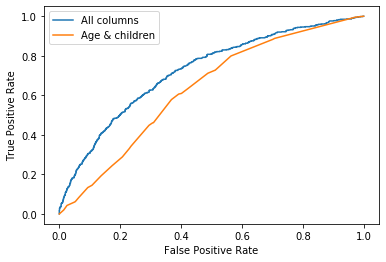

In [49]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [50]:
from sklearn.metrics import roc_curve

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [53]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [54]:
from sklearn.metrics import auc

In [55]:
auc( fpr, tpr )

0.7225943566902437

In [56]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [57]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [58]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [59]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [60]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

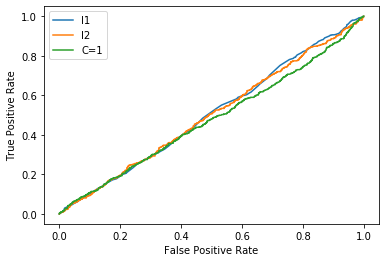

In [61]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [62]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [63]:
Y = data['affair']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [65]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [66]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [67]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

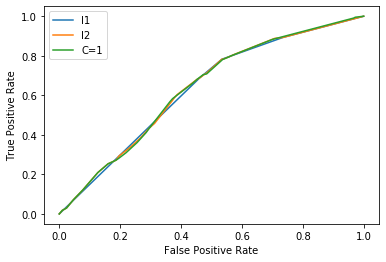

In [68]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()